In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
class Forces(object):
    def __init__(self, filename, filepath):
        f = open(filename, 'r')
        data = []
        for line in f:
            line = line.partition('#')[0]
            line = line.rstrip()
            data.append(line)
        f.close()
        
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D parameters - Cylinder configuration
        a = data.pop(0) #
        self.nx = int(data.pop(0))
        self.ny = int(data.pop(0))
        self.nz = int(data.pop(0))
        self.nphi = int(data.pop(0))
        p_row = int(data.pop(0))
        p_col = int(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D Flow parameters
        a = data.pop(0) #
        self.xlx = float(data.pop(0))
        self.yly = float(data.pop(0))
        self.zlz = float(data.pop(0))
        self.re = float(data.pop(0))
        self.angle = float(data.pop(0))
        self.u1 = float(data.pop(0))
        self.u2 = float(data.pop(0))
        self.noise = float(data.pop(0))
        self.noise1 = float(data.pop(0))
        self.dt = float(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT3D Flow configuration
        a = data.pop(0) #
        self.iin = int(data.pop(0))
        self.ifirst = int(data.pop(0))
        self.ilast = int(data.pop(0))
        self.nscheme = int(data.pop(0))
        self.istret = int(data.pop(0))
        self.beta = float(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D File parameters
        a = data.pop(0) #
        self.ilit = int(data.pop(0))
        self.isave = int(data.pop(0))
        self.imodule = int(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # NUMERICAL DISSIPATION
        a = data.pop(0) #
        self.jLES = int(data.pop(0))
        self.fpi2 = float(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D Body Ramp (old school)
        a = data.pop(0) #
        self.ivirt = int(data.pop(0))
        self.ncil = int(data.pop(0))
        self.cex = np.fromstring(data.pop(0), dtype=float, sep=" ")
        self.cey = np.fromstring(data.pop(0), dtype=float, sep=" ")
        self.ra = float(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D Forcing with Lagrangian Polynomials
        a = data.pop(0) #
        self.ilag  = int(data.pop(0))
        self.npif = int(data.pop(0))
        self.izap = int(data.pop(0))
        self.nraf = int(data.pop(0))
        self.nobjmax = int(data.pop(0))
        a = data.pop(0) #
        a = data.pop(0) # INCOMPACT 3D Forces - Drag and Lift coefficients
        a = data.pop(0) #
        self.nvol = int(data.pop(0))
        self.xld = np.fromstring(data.pop(0), dtype=float, sep=" ")
        self.xrd = np.fromstring(data.pop(0), dtype=float, sep=" ")
        self.yld = np.fromstring(data.pop(0), dtype=float, sep=" ")
        self.yud = np.fromstring(data.pop(0), dtype=float, sep=" ")
        
        del data
        
        self.t = []
        self.drag = []
        self.lift = []
        
        for i in range(self.nvol):
            with open(filepath+'aerof_avr'+str(i+1), 'r') as f:
                data = list(csv.reader(f, delimiter=' ', skipinitialspace=True,
                                       quoting=csv.QUOTE_NONNUMERIC))
            data = np.transpose(data)
            self.t.append(data[0])
            self.drag.append(data[1])
            self.lift.append(data[2])
            
        del data
simulation = {}

In [14]:
############
# Reading
############

ti = 10.
tf = 40.
simulation["Re - 40"] = Forces('../BC-Cylinder.prm','../out/')

200000 799997
CV1:
     Cd    - 1.6227054243437884
     Cl    - -8.450034682690028e-16
     Clrms - 5.220002985558547e-14
200000 799997
CV2:
     Cd    - 1.6231363669151682
     Cl    - -8.487804022090909e-16
     Clrms - 6.485318628068219e-14
200000 799997
CV3:
     Cd    - 1.6230690286951435
     Cl    - -8.61158105791173e-16
     Clrms - 7.74496113619682e-14


<Figure size 432x288 with 0 Axes>

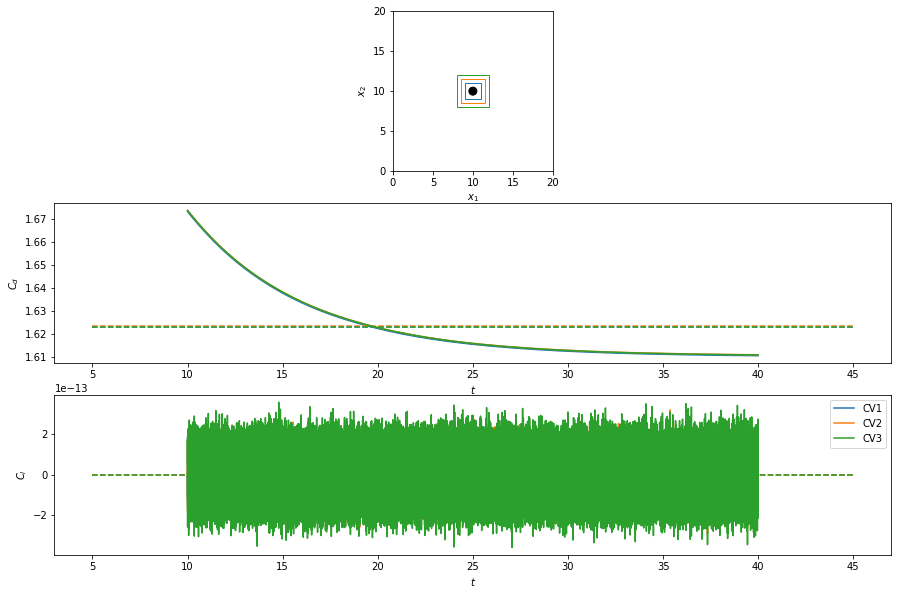

In [17]:
######
# plot
######

plt.clf()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))

for key, data in simulation.items():
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_xlim([0.,data.xlx])
    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylim([0.,data.yly])
    ax1.set_ylabel(r'$x_2$')
    
    #ax2.set_aspect('equal', adjustable='box')
    ax2.set_xlabel(r'$t$')
    #ax2.set_xlim([ti,tf])
    ax2.set_ylabel(r'$C_d$')
    
    #ax3.set_aspect('equal', adjustable='box')
    ax3.set_xlabel(r'$t$')
    #ax3.set_xlim([ti,tf])
    ax3.set_ylabel(r'$C_l$')
    
    for i in range(data.ncil):
        cilinder = plt.Circle((data.cex[i],data.cey[i]),
                              color='black', radius=data.ra)
        ax1.add_artist(cilinder)
    for i in range(data.nvol):
        iti = int(ti/data.dt)
        itf = int(tf/data.dt)-3
        print(iti,itf)
        drag = data.drag[i][iti:itf]
        lift = data.lift[i][iti:itf]
        control_v = plt.Rectangle((data.xld[i],data.yld[i]),
                                  data.xrd[i]-data.xld[i], 
                                  data.yud[i]-data.yld[i],
                                  color='C'+str(i),
                                  label='CV '+str(i+1),fill=None)
        ax1.add_artist(control_v)
        dragm = np.average(drag)
        liftm = np.average(lift)
        rms = np.sqrt(np.mean(lift**2.))
        print('CV'+str(i+1)+':')
        print('     Cd    -',dragm)
        print('     Cl    -',liftm)
        print('     Clrms -',rms)
        ax2.plot((data.t[i][iti]-5,data.t[i][itf]+5), (dragm,dragm), color='C'+str(i), ls='--')
        ax3.plot((data.t[i][iti]-5,data.t[i][itf]+5), (liftm,liftm), color='C'+str(i), ls='--')
        ax2.plot(data.t[i][iti:itf], drag, color='C'+str(i), label='CV'+str(i+1))
        ax3.plot(data.t[i][iti:itf], lift, color='C'+str(i), label='CV'+str(i+1))
ax3.legend()

        